**Stage 1: Dataset Selection and Exploration ***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import glob
import numpy as np
import warnings
import requests
import plotly.express as px

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics
print(data.describe())

Missing Values:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.0

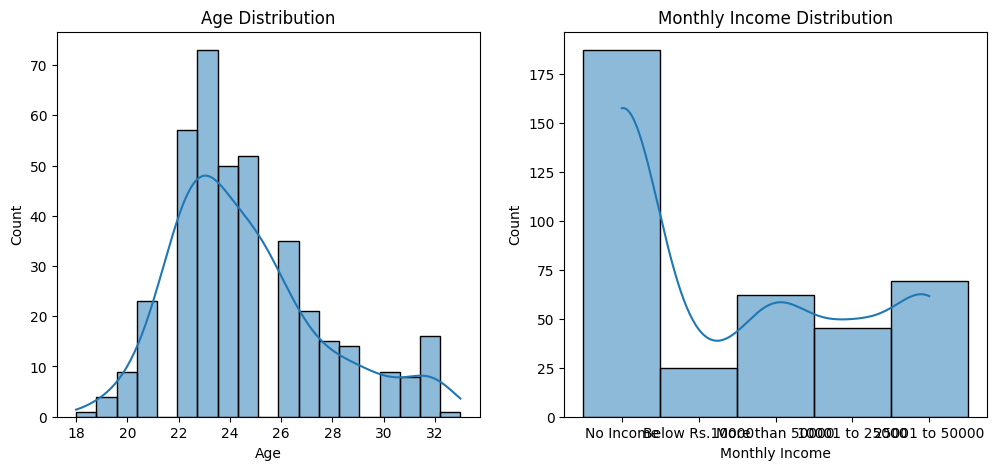

In [4]:
# Visualize the distribution of a key feature, e.g., 'Age'
# Plot distributions of age and monthly income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Monthly Income'], kde=True)
plt.title('Monthly Income Distribution')

plt.show()

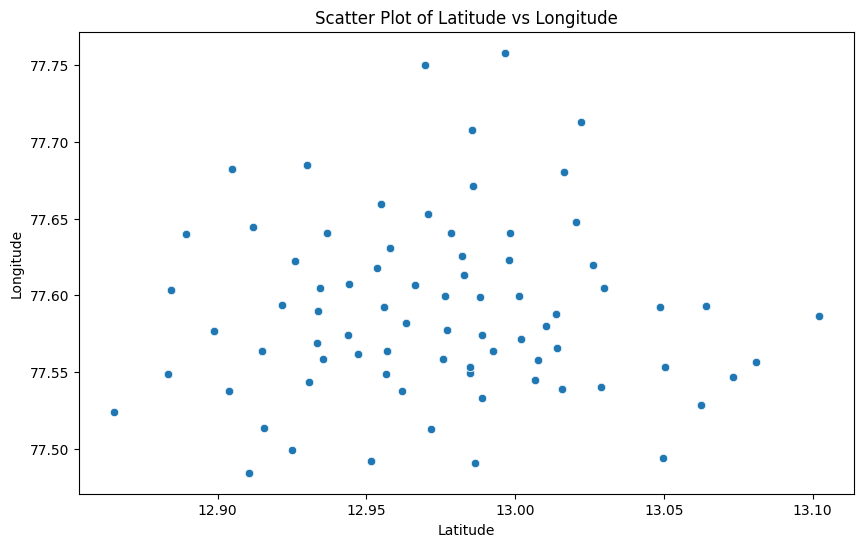

In [36]:
# Scatter Plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', data=data)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


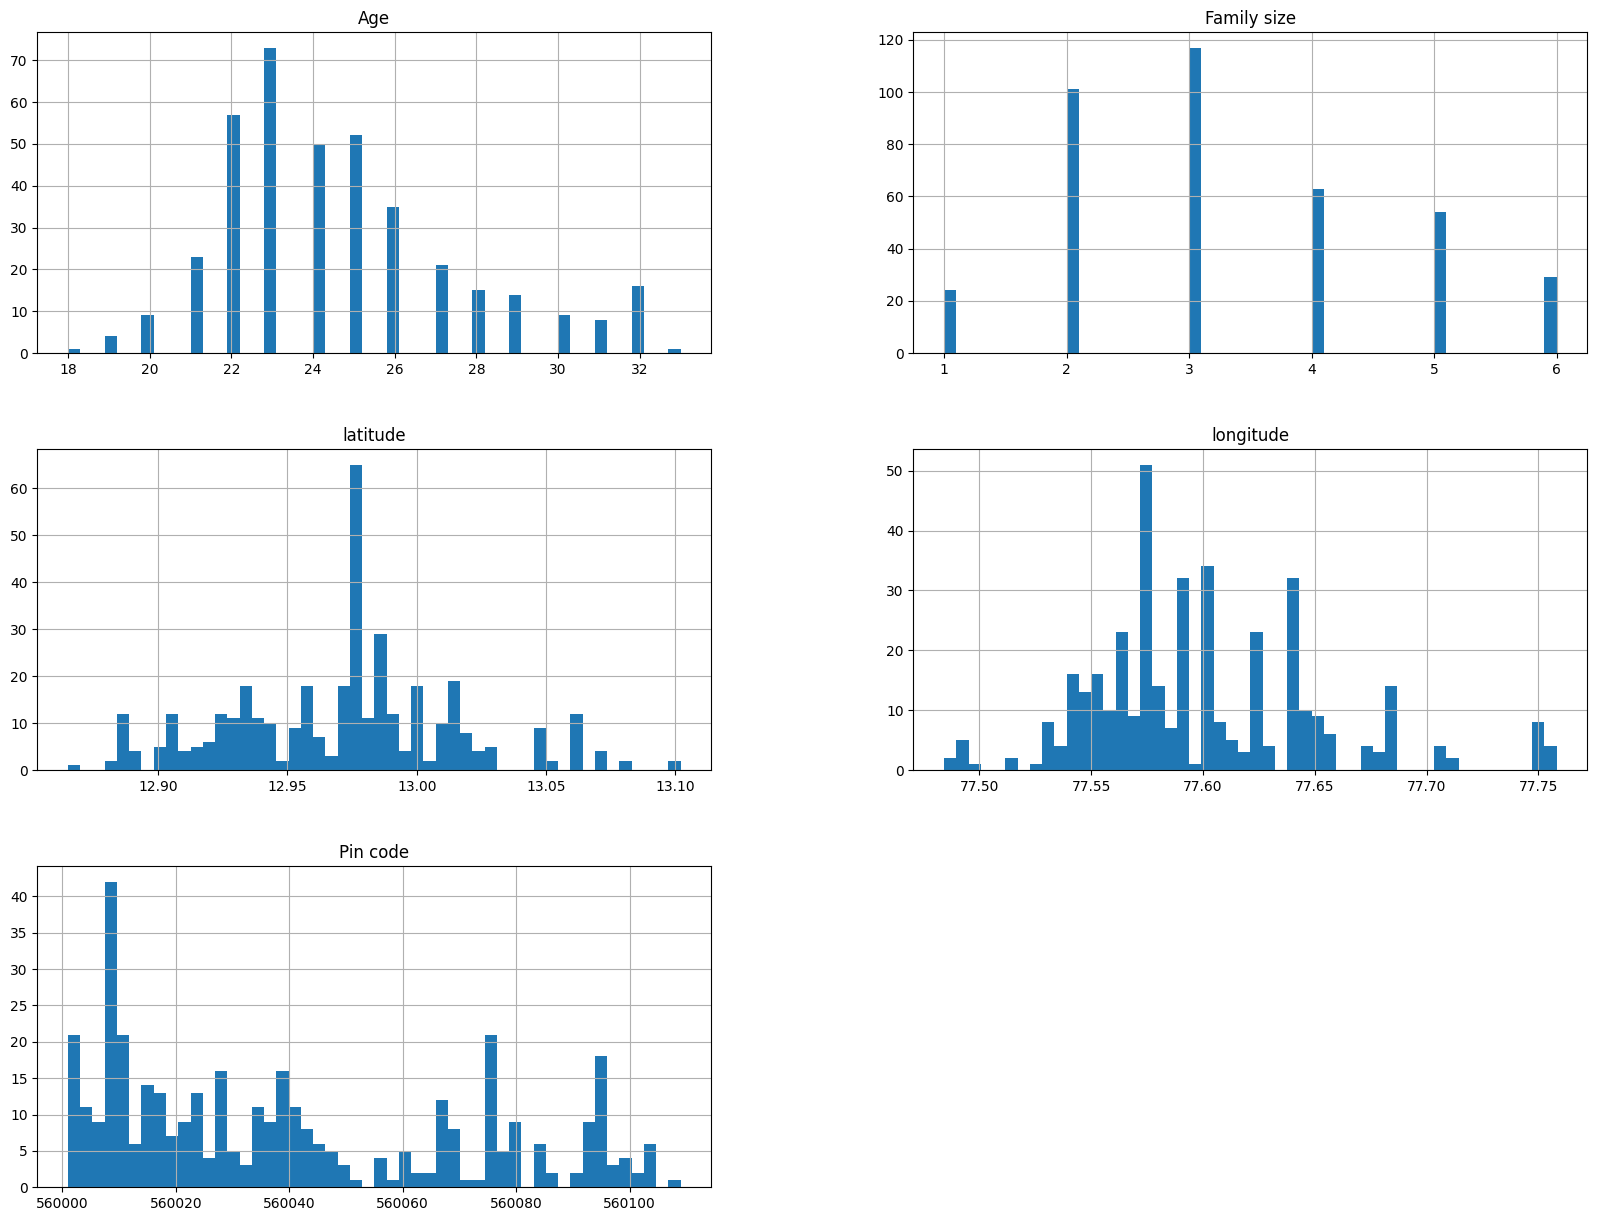

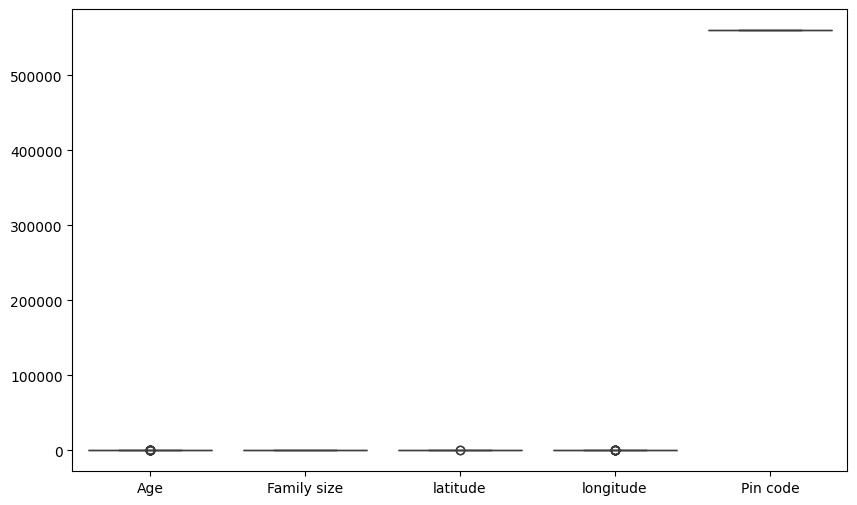

In [37]:
# Histogram visualization for each feature
data.hist(bins=50, figsize=(20,15))
plt.show()

# Boxplot visualization to see outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

**Stage 2: Data Preprocessing***

In [15]:
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 12'])
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications']
numerical_cols = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handling missing values
data = data.dropna()

# Separate features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

print(X_processed.shape)

(388, 26)


**Stage 3: Model Training and Comparison***

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Importing classification_report


In [41]:
# Separate features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) # OneHotEncoder to handle categorical features
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X) # Transform the data using the preprocessor

# Split data into train and test sets after preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_processed.shape)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

performance = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

performance_df = pd.DataFrame(performance)

(388, 26)
Model: Logistic Regression
Accuracy: 0.8717948717948718
Precision: 0.8638009049773755
Recall: 0.8717948717948718
F1-Score: 0.866924120655464
              precision    recall  f1-score   support

          No       0.60      0.50      0.55        12
         Yes       0.91      0.94      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.72      0.74        78
weighted avg       0.86      0.87      0.87        78



Model: Random Forest
Accuracy: 0.8974358974358975
Precision: 0.8916289592760182
Recall: 0.8974358974358975
F1-Score: 0.8935392965243713
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weighted avg       0.89      0.90      0.89        78



Model: SVM
Accuracy: 0.8717948717948718
Precision: 0.86

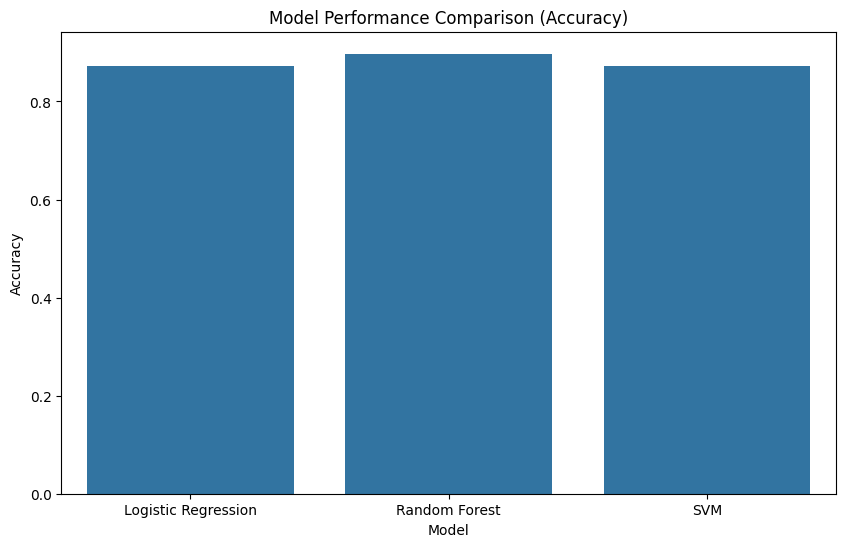

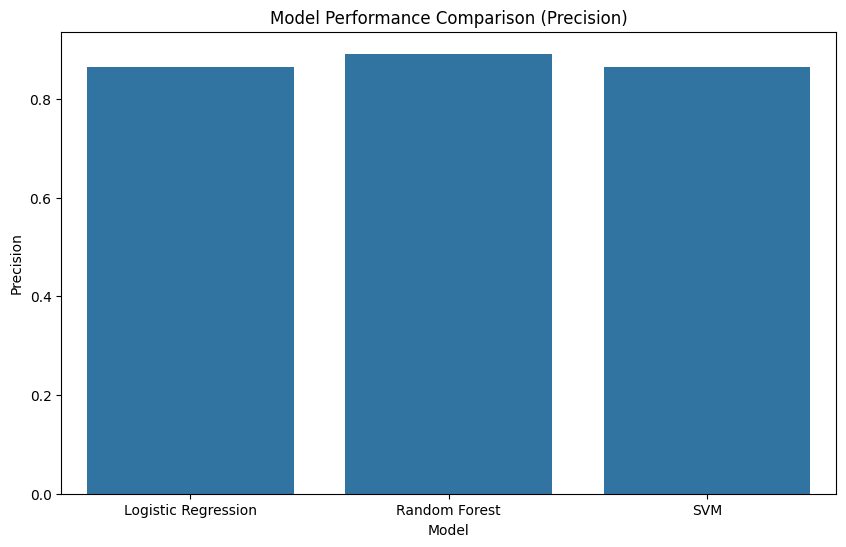

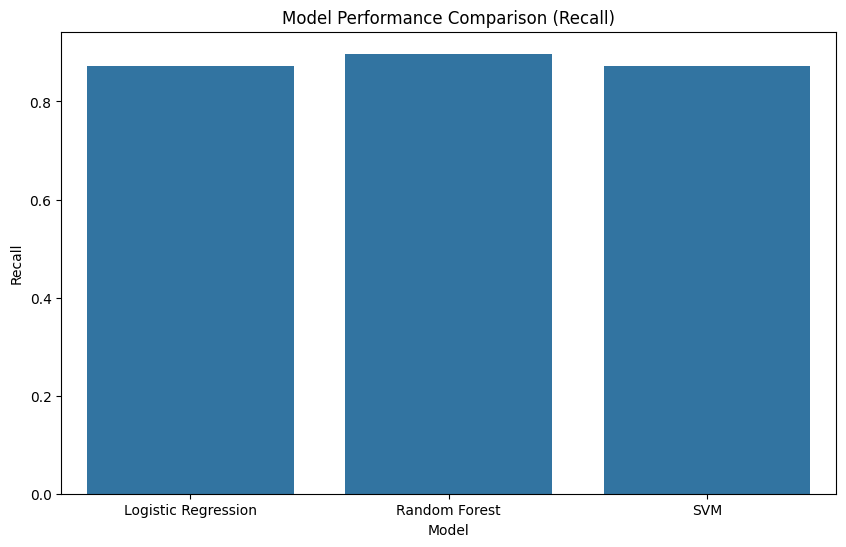

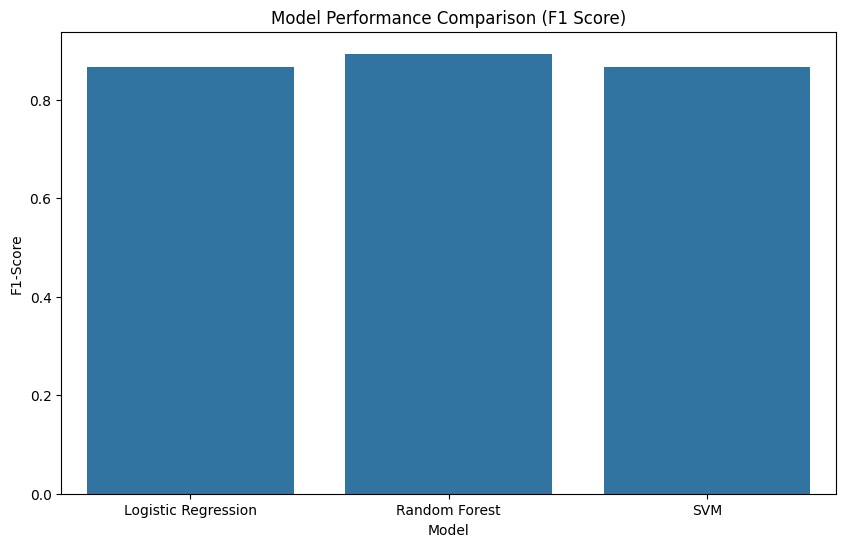

In [42]:
# Visualization of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Performance Comparison (Accuracy)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=performance_df)
plt.title('Model Performance Comparison (Precision)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=performance_df)
plt.title('Model Performance Comparison (Recall)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=performance_df)
plt.title('Model Performance Comparison (F1 Score)')
plt.show()

In [34]:
# Misalnya, kita memilih model Random Forest berdasarkan hasil evaluasi F-1 Score
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Simpan model yang dilatih
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']